# One-way Analysis of Variance (ANOVA) with Python

Testing if different groups or sub-populations arise from the same population, or if they represent different populations (with different parameters).

ANOVA basically decomposes the variances within each group and among groups, relying on the Null Hypothesis that groups / samples have been drawn from the same population, hence their means are equivalent. It produces an F-statistic. 

For high values of F (generally higher than 3.68, which corresponds to a significance level of 5%) we can reject with sufficient confidence the Null, concluding that groups are not arising from the same population.m

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study---manual" data-toc-modified-id="Case-Study---manual-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study - manual</a></span></li><li><span><a href="#Verification-&amp;-Visualization-with-Stats-packages" data-toc-modified-id="Verification-&amp;-Visualization-with-Stats-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Verification &amp; Visualization with Stats packages</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
color='rebeccapurple'
%matplotlib inline

## Case Study - manual

As a case study, imagine a bunch of students from different colleges taking the same exam. You want to see if one college outperforms the other, hence your null hypothesis is that the means of GPAs in each group are equivalent to those of the other groups. To keep it simple, we will consider 3 groups (college ‘A’, ‘B’, ‘C’) with 6 students each.

In [2]:
# Create dataframe

a = [25,25,27,30,23,20]
b = [30,30,21,24,26,28]
c = [18,30,29,29,24,26]

list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
display(df)

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


Necessary assumptions:
- Response variable residuals are (approximately) normally distributed
- Variances of populations are equal
- Responses for a given group are independent and identically distributed normal random variables

In [3]:
# Step 1: compute the average mark for each college

m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


In [4]:
# Step 2: compute the overall mean 

k = 3 # overall number of groups
m = (m1 + m2 + m3)/k

print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


In [5]:
# Step 3: compute the ‘between-group’ sum of squared differences 

n = 6 # number of observations per group
SSb = n*((m1-m)**2 + (m2-m)**2 + (m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


In [6]:
# With those results, we compute one of the components of F-score, which is the between-group mean square value (MSb)

df = k-1
MSb = SSb/df

print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [7]:
# Step 4: calculate the “within-group” sum of squares

err_a_list = list(a-m1)
err_b_list = list(b-m2)
err_c_list = list(c-m3)
err = err_a_list + err_b_list + err_c_list

ssw = [i**2 for i in err]
SSw = np.sum (ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


In [8]:
# Again, knowing that there are k(n-1) within-group degrees of freedom (hence in our case 15), 
# we can compute the within-group mean square value

MSw = SSw / (k*(n-1))
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [9]:
# Step 5: compute the F-score

F = MSb / MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


## Verification & Visualization with Stats packages

In [10]:
# Check result with scipy

import scipy.stats as stats

stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

If the assumptions above are true, the ratio MSb/MSw behaves as a Fisher distribution with (2,15) degrees of freedom

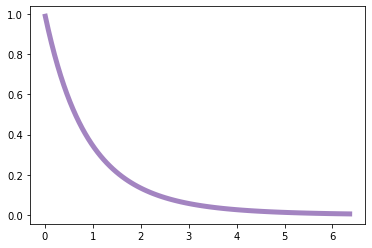

In [11]:
from scipy.stats import f


fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf', color=color);

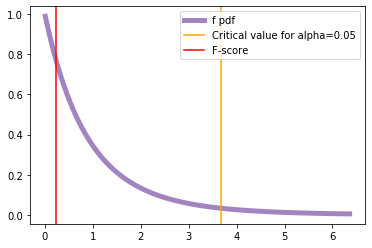

In [13]:
# Set alpha, which the level of significance, equal to 5%. 
# The corresponding F-critical value is 3.68. 

fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf', color=color)
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='orange')
plt.axvline(x=F, label='F-score', color='red')
plt.legend();

**Conclusion:** We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.

---